In [16]:
import numpy as np # linear algebra
import pandas as pd 

In [17]:
import os
import matplotlib.pyplot as plt

In [18]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [21]:
from tqdm.notebook import tqdm

In [22]:
project_name = 'course-project-plant-disease-classification2'

In [23]:
data ='C:/Users/rjabj/Desktop/projects/projet detection des maladie des plante/PlantDoc-Dataset/'
os.listdir(data)

['test', 'train']

In [24]:
os.listdir(data+'train')

['Apple__leaf',
 'Apple__rust leaf',
 'Apple__Scab Leaf',
 'Bell pepper__leaf',
 'Bell pepper__leaf spot',
 'Blueberry__leaf',
 'Cherry__leaf',
 'Corn__Gray leaf spot',
 'Corn__leaf blight',
 'Corn__rust leaf',
 'grape__leaf',
 'grape__leaf black rot',
 'Peach__leaf',
 'Potato__leaf early blight',
 'Potato__leaf late blight',
 'Raspberry__leaf',
 'Soyabean__leaf',
 'Squash Powdery mildew__leaf',
 'Strawberry__leaf',
 'Tomato__Early blight leaf',
 'Tomato__leaf',
 'Tomato__leaf bacterial spot',
 'Tomato__leaf late blight',
 'Tomato__leaf mosaic virus',
 'Tomato__leaf yellow virus',
 'Tomato__mold leaf',
 'Tomato__Septoria leaf spot']

# Number of unique plants

In [25]:
unique_plants = []
cl = os.listdir(data+'train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  13
Unique Plants:  ['Apple', 'Bell pepper', 'Blueberry', 'Cherry', 'Corn', 'grape', 'Peach', 'Potato', 'Raspberry', 'Soyabean', 'Squash Powdery mildew', 'Strawberry', 'Tomato']


# Loading Training and Test Dataset as Tensor

In [26]:
transform = transforms.Compose(
    [transforms.Resize(size = 128),
     transforms.ToTensor()])

In [27]:
dataset = ImageFolder(data+'train',transform=transform)
test_ds = ImageFolder(data+'test',transform=transform)

In [28]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  2316
Number of testing images:  236


# Number of classes

In [29]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  27
['Apple__Scab Leaf', 'Apple__leaf', 'Apple__rust leaf', 'Bell pepper__leaf', 'Bell pepper__leaf spot', 'Blueberry__leaf', 'Cherry__leaf', 'Corn__Gray leaf spot', 'Corn__leaf blight', 'Corn__rust leaf', 'Peach__leaf', 'Potato__leaf early blight', 'Potato__leaf late blight', 'Raspberry__leaf', 'Soyabean__leaf', 'Squash Powdery mildew__leaf', 'Strawberry__leaf', 'Tomato__Early blight leaf', 'Tomato__Septoria leaf spot', 'Tomato__leaf', 'Tomato__leaf bacterial spot', 'Tomato__leaf late blight', 'Tomato__leaf mosaic virus', 'Tomato__leaf yellow virus', 'Tomato__mold leaf', 'grape__leaf', 'grape__leaf black rot']


# Visualising a single image

In [30]:
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 197])
Image Label:  0
Image Label:  Apple__Scab Leaf
tensor([[[0.4196, 0.4902, 0.5294,  ..., 0.4000, 0.3373, 0.3020],
         [0.4196, 0.4588, 0.5059,  ..., 0.3216, 0.2980, 0.2863],
         [0.5059, 0.5020, 0.5373,  ..., 0.3098, 0.3216, 0.3137],
         ...,
         [0.6745, 0.6392, 0.6235,  ..., 0.6706, 0.8824, 0.9490],
         [0.6667, 0.6510, 0.6392,  ..., 0.6510, 0.8314, 0.9451],
         [0.6863, 0.6745, 0.6784,  ..., 0.6314, 0.7216, 0.8431]],

        [[0.5255, 0.6039, 0.6549,  ..., 0.3765, 0.2941, 0.2471],
         [0.5647, 0.6000, 0.6431,  ..., 0.2431, 0.2039, 0.1882],
         [0.6353, 0.6275, 0.6588,  ..., 0.1647, 0.1608, 0.1647],
         ...,
         [0.6314, 0.5412, 0.5098,  ..., 0.6863, 0.6980, 0.7059],
         [0.6196, 0.5608, 0.5255,  ..., 0.6824, 0.6902, 0.6980],
         [0.6510, 0.6235, 0.6078,  ..., 0.6824, 0.6980, 0.7059]],

        [[0.1294, 0.2118, 0.2667,  ..., 0.1922, 0.0980, 0.0471],
         [0.1451, 0.1961, 0.2471,  ..

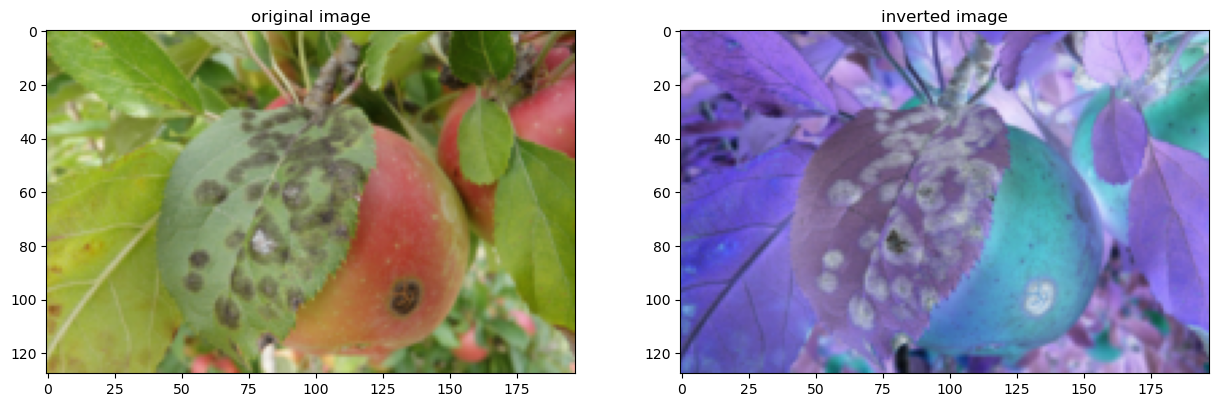

In [31]:
image, label  = dataset[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
plt.show()

# Validation Dataset and Dataloader

In [32]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Define transformations for resizing and converting images to tensors
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),         # Convert images to PyTorch tensors
])

# Define paths
train_dir = "C:/Users/rjabj/Desktop/projects/projet detection des maladie des plante/PlantDoc-Dataset/train"
test_dir = "C:/Users/rjabj/Desktop/projects/projet detection des maladie des plante/PlantDoc-Dataset/test"




In [33]:
# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

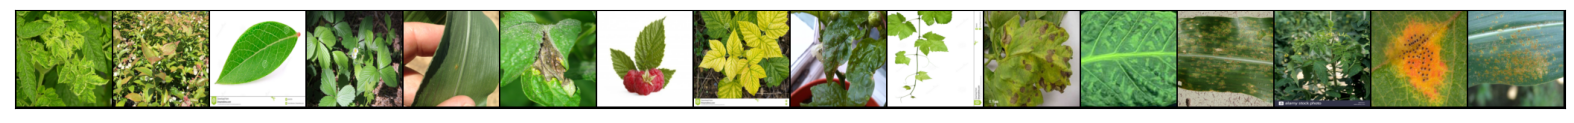

In [63]:


# Create DataLoaders
#train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Visualize a batch of images
#for images, labels in train_loader:
  #  fig, ax = plt.subplots(figsize=(20, 8))
  #  ax.set_xticks([])
   # ax.set_yticks([])
  #  ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
  #  break

In [34]:
dataset = train_dataset
test_ds = test_dataset

In [35]:
random_seed = 42
torch.manual_seed(random_seed)

In [36]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [37]:
batch_size = 64

train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

# Visualising a Batch of images

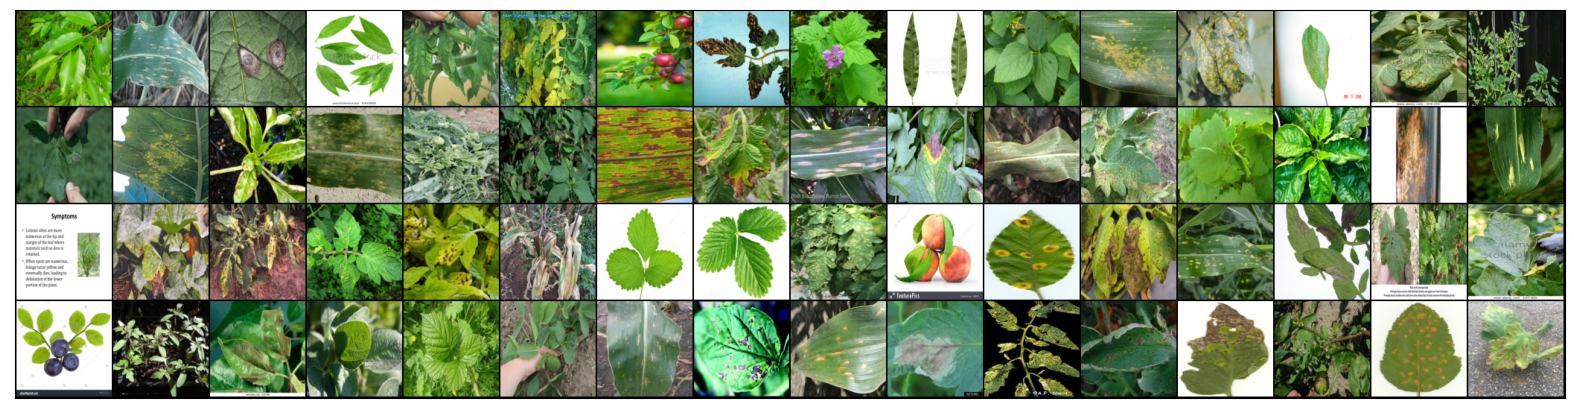

In [38]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

# Building The Model

### Building a Base Image Classification Mode 

In [39]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [out['val_acc'] for out in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))

### Buiding a CNN model 

In [40]:
class Plant_Disease_Model(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16
        
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8
        
        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),
        
        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a VGG16 model using Transfer Learning 

In [41]:
class Plant_Disease_Model1(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a resnet34 model using Transfer Learning¶ 

In [42]:
from torchvision import models
class Plant_Disease_Model2(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.efficientnet_b2(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self, xb):
        return self.network(xb)

### Training and Evaluation 

In [43]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [44]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [45]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [46]:
device = get_default_device()
device

device(type='cpu')

In [47]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [48]:
model = to_device(Plant_Disease_Model2(), device)

C:\Users\rjabj\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rjabj\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to C:\Users\rjabj/.cache\torch\hub\checkpoints\efficientnet_b2_rwightman-c35c1473.pth
100%|█████████████████████████████████████████████████████████████████████████████| 35.2M/35.2M [00:23<00:00, 1.54MB/s]


In [49]:
model

Plant_Disease_Model2(
  (network): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
             

In [50]:
evaluate(model,val_loader)

{'val_loss': 3.6437883377075195, 'val_acc': 0.02609427645802498}

In [51]:
history = fit(10, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [0], train_loss: 2.7280, val_loss: 1.9714, val_acc: 0.4109


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [1], train_loss: 1.3446, val_loss: 1.7254, val_acc: 0.4699


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.7065, val_loss: 1.7993, val_acc: 0.5061


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.4062, val_loss: 1.9791, val_acc: 0.5103


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.2931, val_loss: 1.9536, val_acc: 0.5421


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.2482, val_loss: 2.0358, val_acc: 0.5014


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.1746, val_loss: 2.2443, val_acc: 0.5089


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.2088, val_loss: 2.2794, val_acc: 0.4983


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.1765, val_loss: 2.2224, val_acc: 0.5151


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.1194, val_loss: 2.1360, val_acc: 0.5310


In [52]:
history += fit(5, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.2306, val_loss: 2.5655, val_acc: 0.4946


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.2766, val_loss: 2.3699, val_acc: 0.4952


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.1956, val_loss: 2.3727, val_acc: 0.5110


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.1624, val_loss: 2.5481, val_acc: 0.4935


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.1341, val_loss: 2.6654, val_acc: 0.5026


# Plotting accuracy and losses

In [53]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [54]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

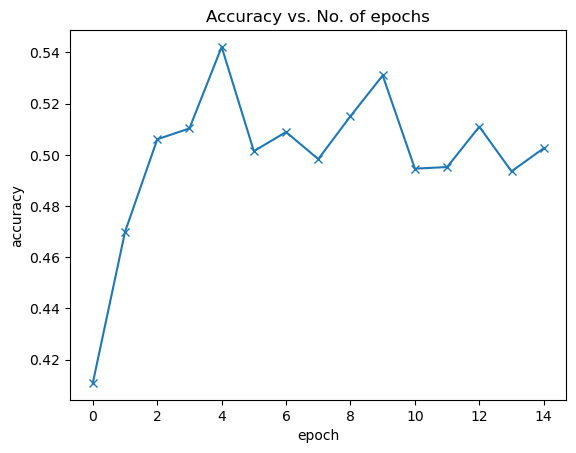

In [55]:
plot_accuracies(history)

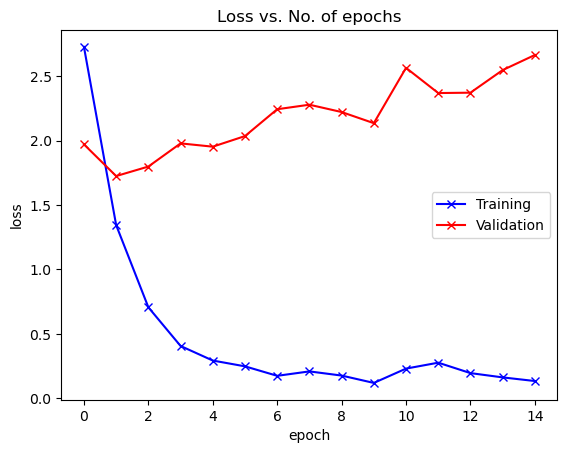

In [56]:
plot_losses(history)

In [57]:
evaluate(model,val_loader)

{'val_loss': 2.6752912998199463, 'val_acc': 0.5023148059844971}

Classification Report:
                             precision    recall  f1-score   support

           Apple__Scab Leaf       0.31      0.50      0.38        10
                Apple__leaf       0.60      0.67      0.63         9
           Apple__rust leaf       0.33      0.30      0.32        10
          Bell pepper__leaf       0.50      0.12      0.20         8
     Bell pepper__leaf spot       0.25      0.67      0.36         9
            Blueberry__leaf       0.40      0.18      0.25        11
               Cherry__leaf       1.00      0.50      0.67        10
       Corn__Gray leaf spot       0.20      0.25      0.22         4
          Corn__leaf blight       0.58      0.58      0.58        12
            Corn__rust leaf       0.70      0.70      0.70        10
                Peach__leaf       0.67      0.89      0.76         9
  Potato__leaf early blight       0.17      0.25      0.20         8
   Potato__leaf late blight       0.33      0.38      0.35         8
          

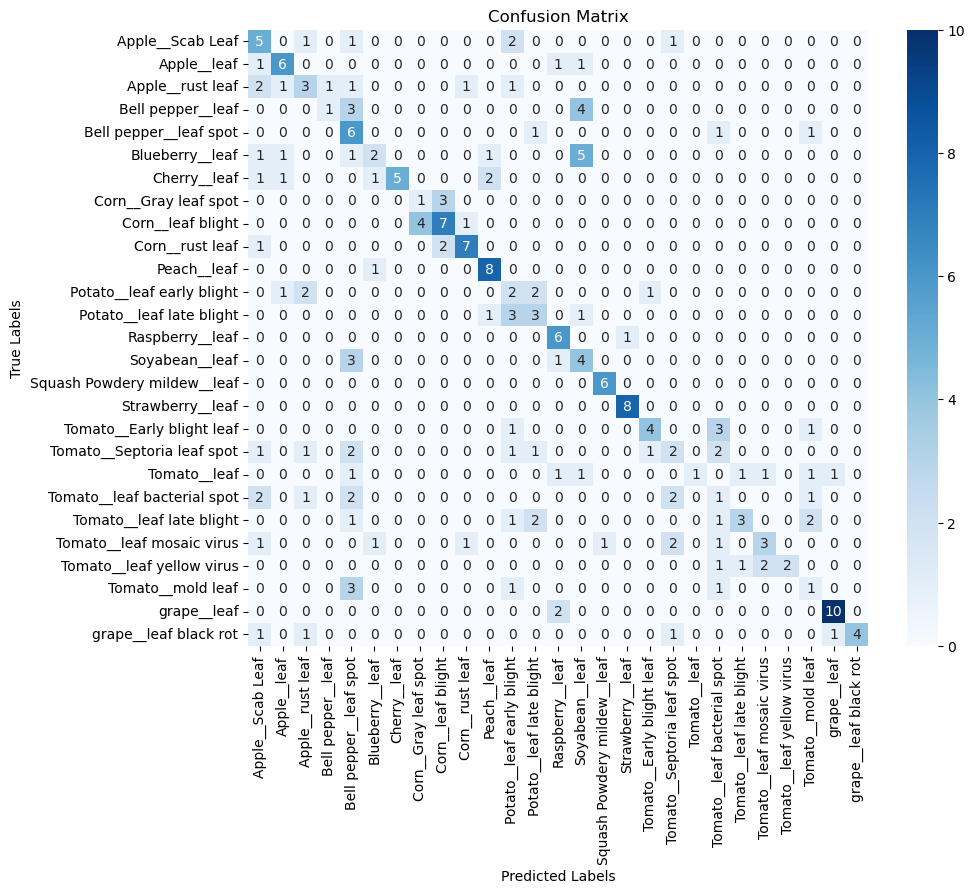

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to get predictions and true labels from the DataLoader
def get_predictions(model, dataloader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Get predictions and true labels from the validation or test set
true_labels, predictions = get_predictions(model, test_loader)

# Classification Report
report = classification_report(true_labels, predictions, target_names=num_classes)
print("Classification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=num_classes, yticklabels=num_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Evaluation and Prediction on Test Data

In [59]:
x = evaluate(model,test_loader)
x

{'val_loss': 2.827228307723999, 'val_acc': 0.46555396914482117}

# Prediction on some single image of test data

In [44]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Apple__rust leaf , Predicted: Tomato__Septoria leaf spot


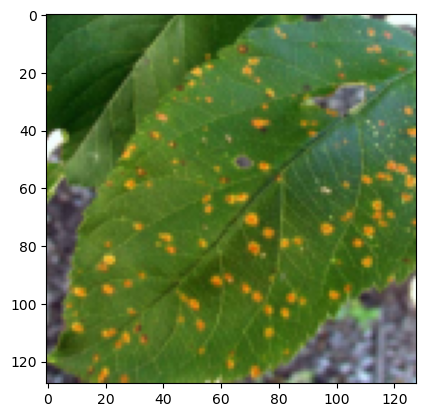

In [45]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [46]:
img, label = test_ds[978]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

IndexError: list index out of range

In [47]:
img, label = test_ds[2548]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

IndexError: list index out of range

# Saving the Model

In [48]:
torch.save(model.state_dict(), 'plantDisease-ConvNEXT.pth')